
<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Three: Classifier training and performance assessment. </h2>	

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import skimage
from skimage import data
from skimage import io
import os
from PIL import Image
import matplotlib.colors as colors
from skimage.feature import hog

from sklearn.preprocessing import StandardScaler
%store -r train_features_full
%store -r test_features_full

In [429]:

def train_test_split_(df):
    train, test = train_test_split(df, train_size=0.8, random_state=13)
    return X_train, X_test
#Split the data into a training set, and test set 
def accuracy(pred, actual):
    return (pred == actual).sum() / len(actual)
# Calculate the accuracy percentage of the predicted values

<h3>  Train models using all of the following methods below. Be sure to drop the actual image column, and the encoding</h3>	Take note of the differences in accuracy, and methods.


In [465]:
train_features_full

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,...,10,11,12,13,14,15,16,17,18,19
0,0,195816.0,0.760638,149.271219,176.718271,183.441062,79.511281,64.007674,56.409146,0.018844,...,0.017647,0.129412,0.020588,0.067647,0.011765,0.035294,0.035294,0.055882,0.135294,0.020588
1,0,221352.0,0.760638,164.942942,189.275548,210.716876,70.290595,74.452940,55.225426,0.009419,...,0.029126,0.087379,0.014563,0.014563,0.082524,0.043689,0.043689,0.033981,0.179612,0.067961
2,0,194535.0,0.760638,111.901534,147.772072,170.099221,89.599499,68.004866,64.162562,0.013740,...,0.025696,0.175589,0.019272,0.040685,0.017131,0.019272,0.012848,0.025696,0.104925,0.038544
3,0,200430.0,0.760638,78.183969,132.628140,152.172444,83.228097,62.691314,64.383826,0.028678,...,0.038328,0.074913,0.033101,0.048780,0.041812,0.036585,0.033101,0.062718,0.069686,0.067944
4,0,208560.0,0.760638,86.430193,150.475129,147.341024,94.165948,71.328112,73.726628,0.009983,...,0.020236,0.180438,0.035413,0.043845,0.015177,0.026981,0.021922,0.050590,0.109612,0.033727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,19,396000.0,0.760638,75.473364,95.817795,114.687318,53.435160,58.080920,63.899266,0.017803,...,0.042449,0.042449,0.050612,0.128163,0.052245,0.070204,0.061224,0.052245,0.038367,0.064490
1497,19,1089906.0,0.760638,104.235614,121.608953,137.934627,48.952810,54.568847,61.924474,0.019141,...,0.059516,0.052595,0.059516,0.123875,0.022837,0.039100,0.049827,0.034948,0.062284,0.050519
1498,19,337500.0,0.760638,116.917671,116.306631,122.347742,72.332607,55.016800,53.973995,0.014756,...,0.038529,0.043783,0.035026,0.071220,0.043783,0.072971,0.044367,0.019848,0.052539,0.076474
1499,19,72468.0,0.760638,99.052699,119.275128,111.179541,58.643853,62.404724,64.023901,0.161078,...,0.029126,0.043689,0.058252,0.019417,0.048544,0.063107,0.038835,0.087379,0.019417,0.072816


In [482]:
test_features_full

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,...,10,11,12,13,14,15,16,17,18,19
0,-1,1620000.0,0.666667,105.558970,106.876167,105.925409,63.118244,65.353151,67.308998,0.022939,...,0.054394,0.047847,0.052128,0.040796,0.046336,0.040292,0.054143,0.046084,0.064719,0.057164
1,-1,91821.0,0.526971,133.939426,147.563237,144.826478,76.766596,77.300304,79.839983,0.144183,...,0.075820,0.055328,0.051230,0.028689,0.030738,0.073770,0.051230,0.053279,0.073770,0.094262
2,-1,312006.0,1.171141,118.651949,123.825542,133.571393,82.190904,72.808358,68.585112,0.026048,...,0.041176,0.047059,0.054412,0.023529,0.042647,0.063235,0.057353,0.054412,0.072059,0.088235
3,-1,70308.0,0.656085,85.566735,83.704130,96.633470,48.439898,52.485363,61.887718,0.004438,...,0.013889,0.277778,0.000000,0.000000,0.027778,0.000000,0.013889,0.027778,0.222222,0.027778
4,-1,244650.0,1.502146,46.820000,40.627652,23.175156,34.211603,28.885951,25.861795,0.002612,...,0.027888,0.075697,0.131474,0.031873,0.071713,0.023904,0.039841,0.023904,0.055777,0.019920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,-1,1229580.0,0.624691,138.483172,88.688035,82.409435,46.178873,34.181486,33.410329,0.006427,...,0.027044,0.042138,0.061006,0.239623,0.023899,0.010063,0.028931,0.023270,0.047170,0.008805
712,-1,490032.0,0.658635,163.278553,128.315543,101.540050,65.378796,70.031171,66.900228,0.000943,...,0.016340,0.196078,0.042484,0.039216,0.035948,0.006536,0.009804,0.035948,0.124183,0.022876
713,-1,185115.0,0.749129,162.880415,126.218329,96.150053,72.482014,59.430975,53.221593,0.008006,...,0.018939,0.238636,0.034091,0.068182,0.007576,0.022727,0.030303,0.022727,0.189394,0.018939
714,-1,842688.0,0.714514,131.551439,108.076957,86.505643,47.628833,43.845392,43.261810,0.001299,...,0.031559,0.043317,0.044554,0.209158,0.008663,0.001238,0.024752,0.008663,0.078589,0.006807


In [467]:
data = train_features_full
data_use = data.copy(deep = True)
#Here only apply the corner matrix feature
for k in range(16):
    x = k // 4
    y = k % 4
    data_use['corner' + str(x) + str(y)] = data['corner'].apply(lambda x: x[k])
data_use = data_use.drop(columns = ['corner','hr','hg','hb','hog'])

In [468]:
train, val = train_test_split(data_use)
train_X = train.drop(columns = ['Encoding'])
train_y = train['Encoding']
val_X = val.drop(columns = ['Encoding'])
val_y = val['Encoding']

In [469]:
train_X

,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,contrast,...,corner12,corner13,corner20,corner21,corner22,corner23,corner30,corner31,corner32,corner33
695,283920.0,0.760638,134.677790,135.117265,126.627399,90.777585,91.450640,95.069613,0.023552,19557.768172,...,0.027895,0.019273,0.004734,0.005748,0.010482,0.007439,0.003888,0.001183,0.002198,0.002705
1391,549222.0,0.760638,123.299595,98.321138,118.410872,60.226006,51.495187,58.670942,0.006724,26818.614661,...,0.001573,0.004545,0.002272,0.022548,0.022548,0.012323,0.000087,0.000000,0.000874,0.003496
784,226800.0,0.760638,60.117989,92.264392,115.683161,40.193325,54.248625,61.594637,0.066786,28686.366091,...,0.006561,0.007196,0.142011,0.098624,0.069630,0.111111,0.147302,0.097989,0.137566,0.181164
301,764160.0,0.760638,135.265543,156.993699,172.422491,59.540577,58.769712,49.487896,0.101979,27533.367603,...,0.032098,0.104020,0.121106,0.134673,0.110364,0.057726,0.123807,0.096106,0.039887,0.045415
1276,107400.0,0.760638,166.123268,186.972821,208.501955,84.498486,68.589397,54.652991,0.013212,18394.965318,...,0.022346,0.006257,0.016089,0.005810,0.016089,0.008045,0.025028,0.014302,0.018771,0.004469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,73728.0,0.760638,58.280680,80.399455,76.486247,48.372785,47.702182,52.901337,0.083415,24919.678958,...,0.272135,0.039714,0.001953,0.209635,0.312500,0.184245,0.011719,0.053385,0.013021,0.060547
779,149400.0,0.760638,194.482189,213.427430,224.225823,82.477635,62.100654,49.294379,0.026406,13996.524197,...,0.000321,0.000000,0.038876,0.116627,0.024096,0.000643,0.038233,0.058474,0.020562,0.007068
472,198000.0,0.760638,114.598545,101.364985,87.112197,80.022641,73.098569,65.950592,0.003652,21242.698951,...,0.000485,0.001939,0.002909,0.003394,0.000727,0.007515,0.005091,0.000000,0.005818,0.003394
812,208800.0,0.760638,115.470302,81.587572,55.105259,53.142541,49.321427,60.002411,0.002213,19629.515667,...,0.000000,0.003448,0.005977,0.019540,0.002759,0.002299,0.000000,0.000460,0.000000,0.000000


In [470]:
train_y

695      9
1391    18
784     10
301      4
1276    16
        ..
919     12
779     10
472      6
812     11
77       0
Name: Encoding, Length: 1125, dtype: int64

In [471]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X_norm = scaler.transform(train_X)
val_X_norm = scaler.transform(val_X)

In [472]:
train_X_norm

array([[-0.20952636,  0.        ,  0.56447486, ..., -0.6274394 ,
        -0.61437367, -0.52218563],
       [-0.00531986,  0.        ,  0.31365556, ..., -0.65078603,
        -0.63961756, -0.50726316],
       [-0.25349239,  0.        , -1.07911072, ...,  1.28233992,
         1.9669258 ,  2.84506877],
       ...,
       [-0.27566013,  0.        ,  0.12185087, ..., -0.65078603,
        -0.5453377 , -0.50918614],
       [-0.26734723,  0.        ,  0.14106774, ..., -0.64171573,
        -0.65628292, -0.57322469],
       [-0.25426826,  0.        ,  1.01765409, ..., -0.62562289,
        -0.6522292 , -0.56520236]])

Logistic Regression

In [473]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter=10000).fit(train_X_norm, train_y)

In [552]:
print("train: %s" % accuracy(model1.predict(train_X_norm), train_y))
print("val: %s" % accuracy(model1.predict(val_X_norm), val_y))
val_1 = accuracy(model1.predict(val_X_norm), val_y)

train: 0.5831111111111111
val: 0.4015957446808511


K-nearest Neighbors

In [553]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier().fit(train_X_norm, train_y)
print("train: %s" % accuracy(model2.predict(train_X_norm), train_y))
print("val: %s" % accuracy(model2.predict(val_X_norm), val_y))
val_2 = accuracy(model2.predict(val_X_norm), val_y)

train: 0.49777777777777776
val: 0.30319148936170215


Classification Tree

In [554]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth = 20).fit(train_X_norm, train_y)
print("train: %s" % accuracy(model3.predict(train_X_norm), train_y))
print("val: %s" % accuracy(model3.predict(val_X_norm), val_y))
val_3 = accuracy(model3.predict(val_X_norm), val_y)

train: 0.9955555555555555
val: 0.2872340425531915


Random Forest

In [557]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(oob_score = True).fit(train_X_norm, train_y)
print("train: %s" % accuracy(model4.predict(train_X_norm), train_y))
print("val: %s" % accuracy(model4.predict(val_X_norm), val_y))
val_4 = accuracy(model4.predict(val_X_norm), val_y)

train: 1.0
val: 0.43617021276595747


Support Vector Machine

In [558]:
from sklearn.svm import SVC
model5 = SVC().fit(train_X_norm, train_y)
print("train: %s" % accuracy(model5.predict(train_X_norm), train_y))
print("val: %s" % accuracy(model5.predict(val_X_norm), val_y))
val_5 = accuracy(model5.predict(val_X_norm), val_y)

train: 0.6311111111111111
val: 0.3882978723404255


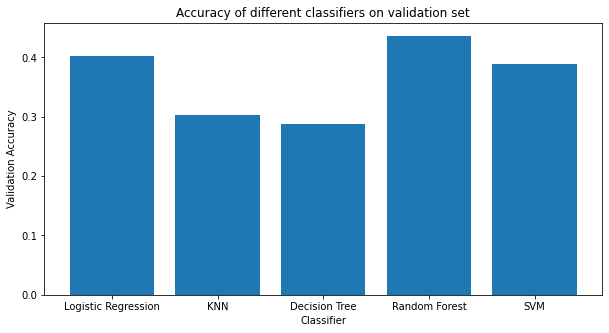

In [6]:
# Here make the plot of each classifier
val_acc = [val_1, val_2, val_3, val_4, val_5]
model_labels = ['Logistic Regression','KNN','Decision Tree','Random Forest','SVM']
plt.figure(figsize = (10,5))
plt.bar(model_labels, val_acc)
plt.xlabel("Classifier")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy of different classifiers on validation set")
plt.show()

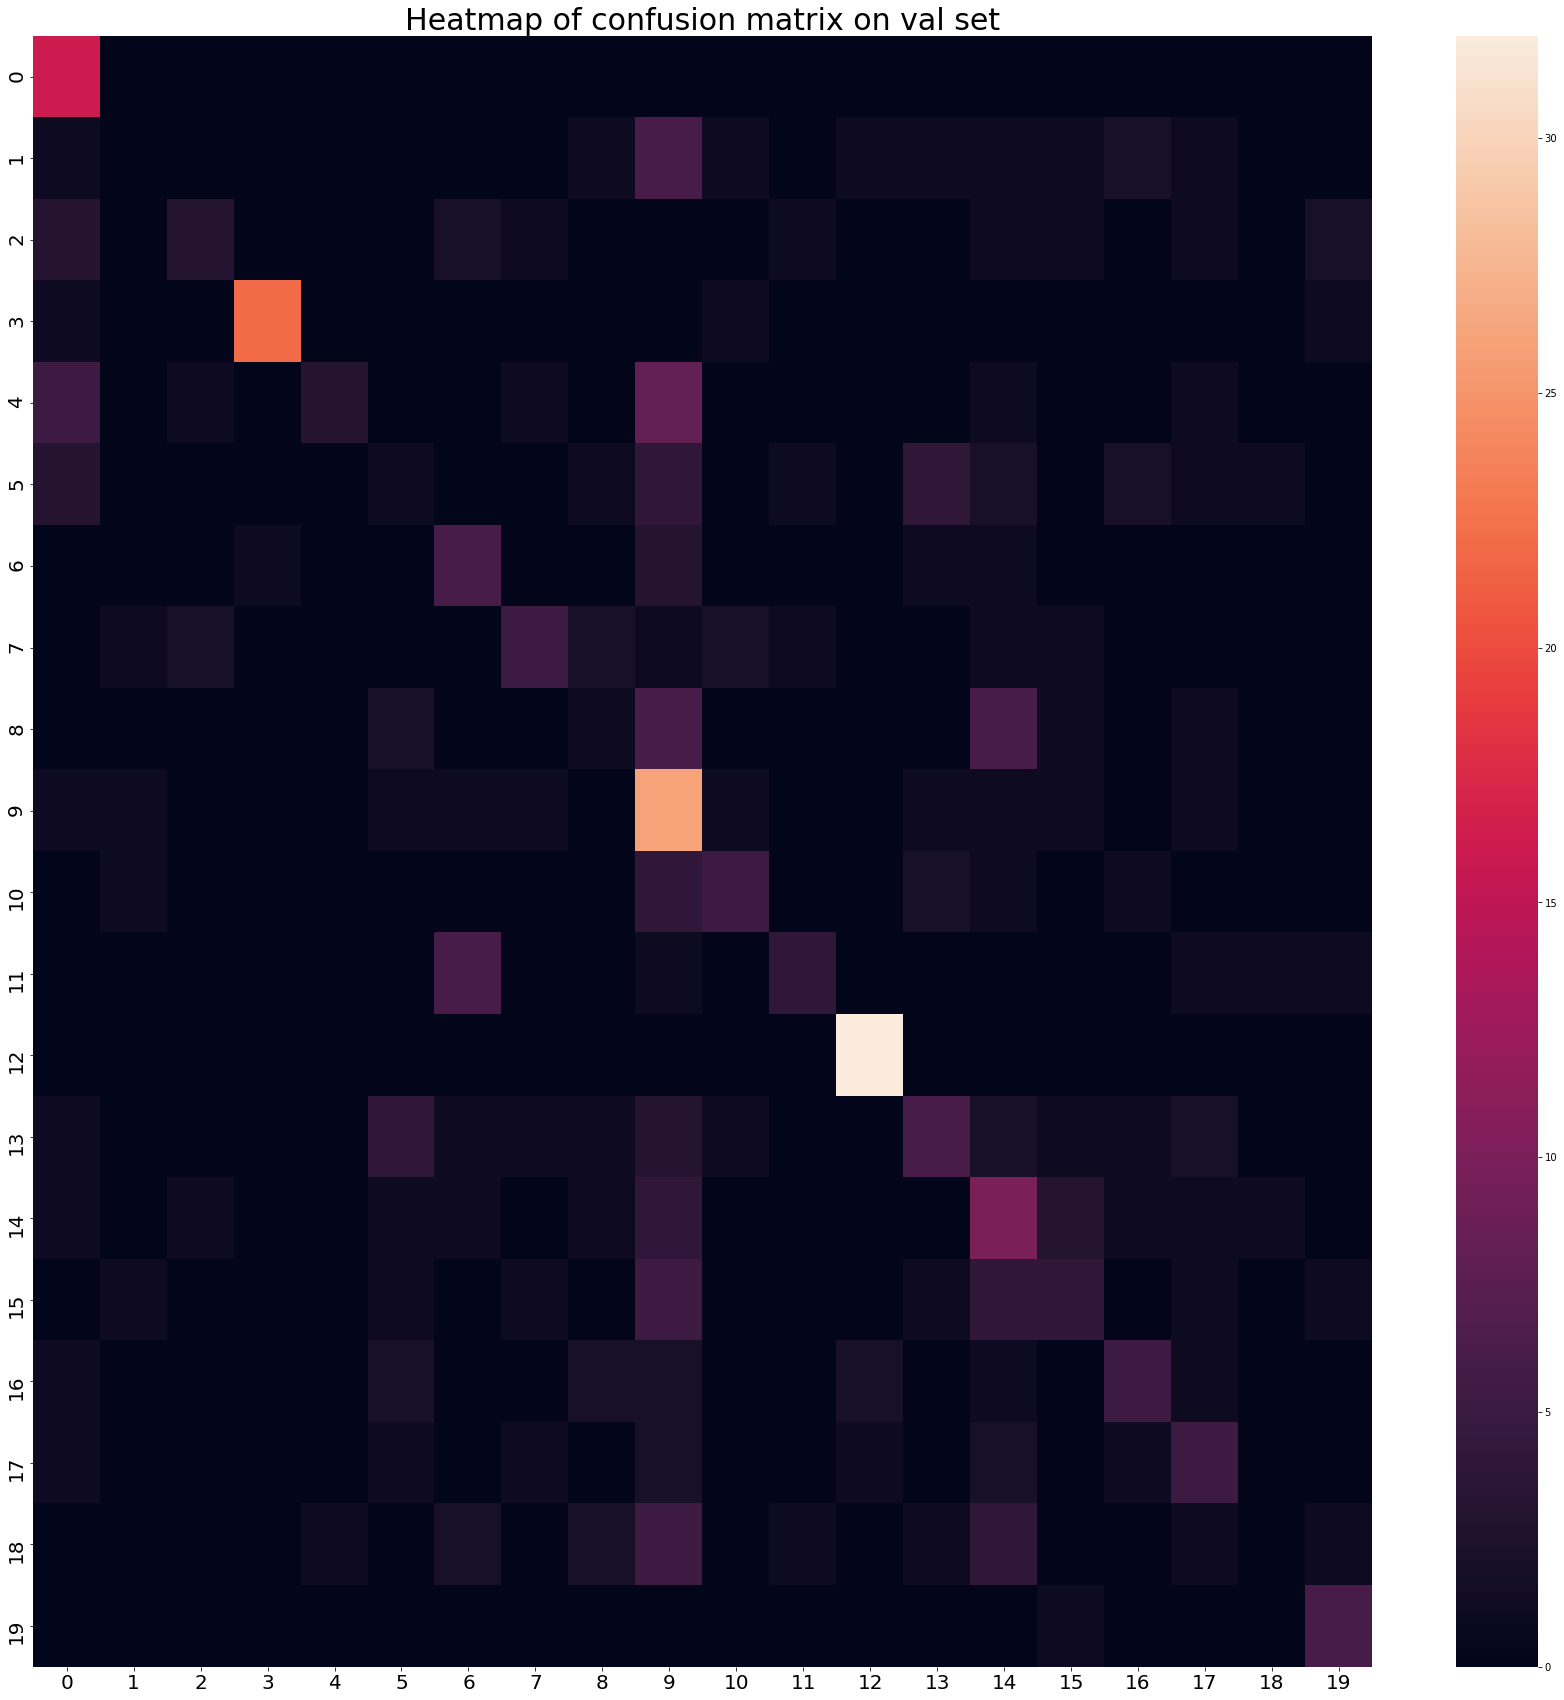

In [530]:
# It seems that Random Forest is most suitable for this question. So the following part most centered on RandomForest.
# First, analyze what the model did well and what the model did poorly. Here we use confusion matrix
category_dist = ['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo'\
                , 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = model4.predict(val_X_norm)
confused = confusion_matrix(val_y, y_pred)
plt.figure(figsize=(30,30))
sns.heatmap(confused)
plt.title('Heatmap of confusion matrix on val set', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()


In [532]:
# From the plot, we can see that some kinds of pictures are predicted well, while some aren't.
# Here, we output what the classifier most likely to predict for each kind
for i in range(20):
    print(category_dist[i],':',category_dist[np.argmax(confused[i])])
# We can see that, the model does well for some kinds, especially for airplanes, comet, gorilla, leopards and penguin, which are the brightest in the heatmap.
# However, for some other kinds, the model tends to confuse them with other kinds. 
# For example, the model tends to predict a lot of other animals as gorilla.
# Also, the model tends to predict blimp as airplanes.

airplanes : airplanes
bear : gorilla
blimp : airplanes
comet : comet
crab : gorilla
dog : gorilla
dolphin : dolphin
giraffe : giraffe
goat : gorilla
gorilla : gorilla
kangaroo : kangaroo
killer-whale : dolphin
leopards : leopards
llama : llama
penguin : penguin
porcupine : gorilla
teddy-bear : teddy-bear
triceratops : triceratops
unicorn : gorilla
zebra : zebra


In [ ]:
# Now I use try to fine-tune the parameters in Random Forest
# First, I combine all the data together 
full = data_use
full_X = full.drop(columns = ['Encoding'])
full_y = full['Encoding']
scaler_full = StandardScaler()
scaler_full.fit(full_X)
full_X_norm = scaler_full.transform(full_X)
model_final.fit(full_X_norm, full_y)

In [537]:
# Then use gridsearch and cross-validation to fine-tune the parameters

from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()
paras = {
    'oob_score': [True],
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [2,4,6,10,15],
    'n_estimators': [250,300,350,400,450,500]
}
rf = GridSearchCV(rf_model, paras, refit = True, verbose = True, n_jobs = -1, cv = 5, return_train_score = True)
rf.fit(full_X_norm, full_y)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 4, 6, 10, 15],
                         'n_estimators': [250, 300, 350, 400, 450, 500],
                         'oob_score': [True]},
             return_train_score=True, verbose=True)

In [538]:
print('Best params:')
print(rf.best_estimator_)

Best params:
RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=300,
                       oob_score=True)


In [483]:
# Doing the same operation for test_X
test_use = test_features_full.copy(deep = True)
for k in range(16):
    x = k // 4
    y = k % 4
    test_use['corner' + str(x) + str(y)] = test_features_full['corner'].apply(lambda x: x[k])
test_use = test_use.drop(columns = ['corner','hr','hg','hb','hog'])
test_use

,Encoding,size,ratio,rm,gm,bm,rd,gd,bd,corner_rate,...,corner12,corner13,corner20,corner21,corner22,corner23,corner30,corner31,corner32,corner33
0,-1,1620000.0,0.666667,105.558970,106.876167,105.925409,63.118244,65.353151,67.308998,0.022939,...,0.063496,0.000207,0.041511,0.025452,0.035467,0.004415,0.048059,0.020830,0.003793,0.001363
1,-1,91821.0,0.526971,133.939426,147.563237,144.826478,76.766596,77.300304,79.839983,0.144183,...,0.040775,0.116052,0.175123,0.128075,0.042866,0.175646,0.286470,0.294835,0.231058,0.337178
2,-1,312006.0,1.171141,118.651949,123.825542,133.571393,82.190904,72.808358,68.585112,0.026048,...,0.004154,0.001077,0.001846,0.000923,0.006615,0.001231,0.114921,0.088306,0.081075,0.097383
3,-1,70308.0,0.656085,85.566735,83.704130,96.633470,48.439898,52.485363,61.887718,0.004438,...,0.021164,0.000000,0.000000,0.000683,0.000000,0.000683,0.008193,0.002048,0.000000,0.000000
4,-1,244650.0,1.502146,46.820000,40.627652,23.175156,34.211603,28.885951,25.861795,0.002612,...,0.002551,0.000000,0.017069,0.007848,0.004513,0.000000,0.000000,0.000000,0.008044,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,-1,1229580.0,0.624691,138.483172,88.688035,82.409435,46.178873,34.181486,33.410329,0.006427,...,0.000898,0.000000,0.000586,0.058518,0.017762,0.000117,0.000000,0.010813,0.009330,0.000000
712,-1,490032.0,0.658635,163.278553,128.315543,101.540050,65.378796,70.031171,66.900228,0.000943,...,0.002155,0.000000,0.000882,0.001959,0.002155,0.003526,0.001469,0.000000,0.000686,0.000588
713,-1,185115.0,0.749129,162.880415,126.218329,96.150053,72.482014,59.430975,53.221593,0.008006,...,0.001556,0.000000,0.004667,0.008816,0.009075,0.000519,0.000000,0.008298,0.021262,0.002074
714,-1,842688.0,0.714514,131.551439,108.076957,86.505643,47.628833,43.845392,43.261810,0.001299,...,0.000171,0.003133,0.011791,0.000627,0.000854,0.003532,0.000171,0.000114,0.000171,0.000000


In [542]:
# Here we use the best performance model Logistic Regression to predict the label on test set:
# From theory, the more data there is, the better the model is. So here we combine train set and val set as full train set
model_final = RandomForestClassifier(n_estimators = 300, max_depth=20, oob_score = True, min_samples_leaf=2)
model_final.fit(full_X_norm, full_y)
print("test: %s" % accuracy(model_final.predict(full_X_norm), full_y))



test: 1.0


In [547]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_final, full_X_norm, full_y, cv=5)
print(scores)

[0.42524917 0.42       0.42666667 0.41333333 0.44666667]


In [545]:

test_X = test_use.drop(columns = ['Encoding'])
test_X_norm = scaler_full.transform(test_X)
model_final.predict(test_X_norm)

array([ 9,  8, 14, 16,  3,  9, 14, 14, 14,  9,  5,  5, 14, 15,  4, 14, 14,
        6,  1, 14, 14,  9, 19,  9, 14, 14,  0,  5,  9,  8, 16, 10,  9, 14,
       16, 11,  9,  3, 13, 13, 14, 10,  6, 12, 14,  0, 19, 19, 19, 19, 15,
       19, 19, 19, 19, 11, 19, 19, 19, 19, 19, 19, 19, 19, 14, 19, 19,  6,
       19, 19, 19, 19, 15, 19, 19,  9, 19,  9, 13, 10,  5,  8, 16,  9, 17,
       13,  9, 10, 14, 19, 14,  9, 14, 16,  9, 14, 15, 10,  9,  9,  6, 19,
        9, 14,  9, 14, 12,  8,  9,  9,  6,  8, 15, 13, 16, 17, 19,  9,  9,
        9, 15,  6,  0,  5,  8,  9, 13, 15, 13, 14,  0,  9, 17, 17, 17,  9,
       14, 17, 17, 14,  9, 16, 12, 17, 14,  9,  7,  4,  7, 19, 10,  9, 15,
       12, 15, 13, 12,  0, 13, 15, 19, 15,  9, 15, 10, 19,  9,  0, 12,  5,
       16, 16, 16, 16, 16,  4, 17, 16, 16,  3,  3,  3,  3,  3,  9,  3,  3,
        3,  3,  3,  3,  3,  9,  3,  3,  3,  3,  3, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

In [486]:
import joblib
joblib.dump(model_final, 'model_final.pkl')

['model_final.pkl']

In [487]:
pd.DataFrame(model_final.predict(test_X_norm)).to_csv('model_fraction_prediction.csv')